# Broadcast

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import the data
b_1_c = pd.read_csv('bcast/bcast1_core_thin.csv')
b_1_s = pd.read_csv('bcast/bcast1_socket_thin.csv')
b_2_c = pd.read_csv('bcast/bcast2_core_thin.csv')
b_2_s = pd.read_csv('bcast/bcast2_socket_thin.csv')
b_4_c = pd.read_csv('bcast/bcast4_core_thin.csv')
b_4_s = pd.read_csv('bcast/bcast4_socket_thin.csv')


In [9]:
bcast = b_1_c

In [10]:
# Define numpy X matrix and y vector
X = bcast[['Processes', 'Size']]
y = bcast['Latency']

In [11]:
# Baseline model
model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                Latency   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              1261.
Date:                Thu, 23 May 2024   Prob (F-statistic):                   2.38e-191
Time:                        20:42:09   Log-Likelihood:                         -3046.2
No. Observations:                 480   AIC:                                      6096.
Df Residuals:                     478   BIC:                                      6105.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
# Improved model:
# define two new features: log2(Latency) and log2(Size)
bcast['log2_Latency'] = np.log2(bcast['Latency'])
bcast['log2_Size'] = np.log2(bcast['Size'])
X = bcast[['Processes','log2_Size']]
y = bcast['log2_Latency']

In [13]:
# Improved model
model = sm.OLS(y, X).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:           log2_Latency   R-squared (uncentered):                   0.884
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              1819.
Date:                Thu, 23 May 2024   Prob (F-statistic):                   3.30e-224
Time:                        20:42:09   Log-Likelihood:                         -918.94
No. Observations:                 480   AIC:                                      1842.
Df Residuals:                     478   BIC:                                      1850.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

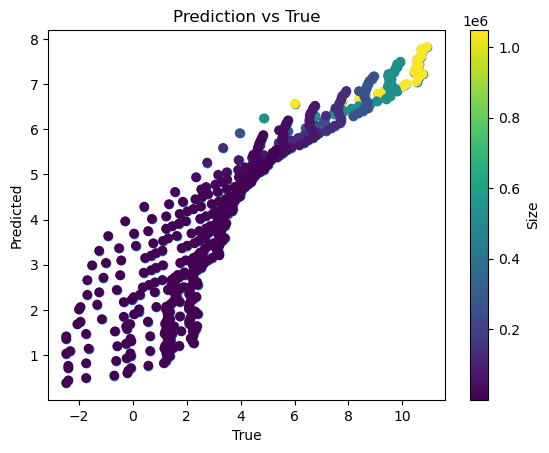

In [14]:
#plot prediction vs true
y_pred = model.predict(X)
plt.scatter(y, y_pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Prediction vs True')
#color points according to the size
plt.scatter(y, y_pred, c=bcast['Size'])
cbar = plt.colorbar()
cbar.set_label('Size')

plt.show()
